# NVIDIA AI Foundation Endpoints

The `ChatNVIDIA` class is a LangChain chat model that connects to [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/).


> [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/) give users easy access to NVIDIA hosted API endpoints for NVIDIA AI Foundation Models like Mixtral 8x7B, Llama 2, Stable Diffusion, etc. These models, hosted on the [NVIDIA NGC catalog](https://catalog.ngc.nvidia.com/ai-foundation-models), are optimized, tested, and hosted on the NVIDIA AI platform, making them fast and easy to evaluate, further customize, and seamlessly run at peak performance on any accelerated stack.
> 
> With [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/), you can get quick results from a fully accelerated stack running on [NVIDIA DGX Cloud](https://www.nvidia.com/en-us/data-center/dgx-cloud/). Once customized, these models can be deployed anywhere with enterprise-grade security, stability, and support using [NVIDIA AI Enterprise](https://www.nvidia.com/en-us/data-center/products/ai-enterprise/).
> 
> These models can be easily accessed via the [`langchain-nvidia-ai-endpoints`](https://pypi.org/project/langchain-nvidia-ai-endpoints/) package, as shown below.

This example goes over how to use LangChain to interact with and develop LLM-powered systems using the publicly-accessible AI Foundation endpoints.

## Installation

In [1]:
# %pip install --upgrade --quiet langchain-nvidia-ai-endpoints

## Setup

**To get started:**

1. Create a free account with the [NVIDIA NGC](https://catalog.ngc.nvidia.com/) service, which hosts AI solution catalogs, containers, models, etc.

2. Navigate to `Catalog > AI Foundation Models > (Model with API endpoint)`.

3. Select the `API` option and click `Generate Key`.

4. Save the generated key as `NVIDIA_API_KEY`. From there, you should have access to the endpoints.

In [2]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvapi_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvapi_key.startswith("nvapi-"), f"{nvapi_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvapi_key

In [3]:
## Core LC Chat Interface
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="mixtral_8x7b")
result = llm.invoke("Write a ballad about LangChain.")
print(result.content)

In a world where information flows like a river,
There came a chain, strong and brave, to deliver.
A chain of language, a tool so grand,
Connecting hearts and minds across the land.

LangChain, oh LangChain, a marvel to behold,
A story of unity, of voices brave and bold.
Through the power of words, a bond is made,
A tapestry woven, a path is laid.

From the East to the West, from the North to the South,
LangChain speaks every language, with understanding and truth.
No matter the distance, no matter the strife,
LangChain brings us together, a bridge through the divide.

Through the whispers of the wind, and the roar of the sea,
LangChain carries the message, for all to see.
A beacon of hope, a light in the dark,
A chain unbroken, a spark.

In a world of change, where the future is uncertain,
LangChain stands strong, a symbol of union.
A ballad of unity, a song of peace,
LangChain, oh LangChain, the key to release.

So here's to LangChain, a chain so bright,
A force for good, in the day 

### Stream, Batch, and Async

These models natively support streaming and expose a batch method to handle concurrent requests, as well as async methods for invoke, stream, and batch. Below are a few examples.

In [4]:
print(llm.batch(["What's 2*3?", "What's 2*6?"]))
# Or via the async API
# await llm.abatch(["What's 2*3?", "What's 2*6?"])

[ChatMessage(content="The product of 2 and 3 is 6. Is there anything else you would like to know? I'm here to help with any questions you have to the best of my ability. Mathematical operations, like multiplication, are something that I can certainly assist with.", response_metadata={'role': 'assistant', 'content': "The product of 2 and 3 is 6. Is there anything else you would like to know? I'm here to help with any questions you have to the best of my ability. Mathematical operations, like multiplication, are something that I can certainly assist with.", 'token_usage': {'completion_tokens': 57, 'prompt_tokens': 17, 'total_tokens': 74}, 'model_name': 'mixtral_8x7b'}, role='assistant'), ChatMessage(content='Two times six equals twelve. Is there anything else you would like to know? I can help with a wide range of topics, including but not limited to science, math, history, and entertainment.', response_metadata={'role': 'assistant', 'content': 'Two times six equals twelve. Is there anyt

In [5]:
for chunk in llm.stream("How far can a seagull fly in one day?"):
    # Show the token separations
    print(chunk.content, end="|")

Se|ag|ull|s| typically| fly| around| 4|0| to| 6|0| miles| per| day|,| but| they| can| travel| up| to| 1|5|0| miles| if| necessary|.| F|act|ors| such| as| the| species| of| the| se|ag|ull|,| their| health|,| weather| conditions|,| and| the| purpose| of| their| flight| can| greatly| influence| this| distance|.| For| instance|,| migr|atory| se|ag|ull|s| may| fly| up| to| 6|0|0| miles| in| a| day| during| their| migration|.| However|,| it|'|s| important| to| note| that| these| are| approximate| distances| and| can| vary| greatly|.||

In [6]:
async for chunk in llm.astream(
    "How long does it take for monarch butterflies to migrate?"
):
    print(chunk.content, end="|")

Monarch| butter|fl|ies| have| one| of| the| longest migrations| of| any insect|, but| they| do not complete it| in a single generation. The entire round|-|t|rip| migration| takes| about eight| months| to| complete|,| but| it| is| done| in| stages|,| with| multiple| generations| of| butter|fl|ies| participating|.|

The| mon|arch|s| that| leave| their| breed|ing| grounds| in| the| nort|he|astern| parts| of| the| U|.|S|.| and| Canada| in| the| fall| fly| to| their| winter|ing| sites| in| the| o|y|am|el| fir| forests| of| central| Mexico|.| This| journey| can| take| up| to| two| months|,| depending| on| factors| like| weather| conditions| and| the| distance| to| their| destination|.|

Once| they| reach| Mexico|,| they| stay| there| for| the| winter|,| and| then| start| to| migrate| north| again| in| the| early| spring|.| However|,| these| butter|fl|ies| do| not| make| it| all| the| way| back| to| their| starting| point|.| Instead|,| they| lay| eggs| along| the| way|,| and| it| is| the| nex

## Supported models

Querying `available_models` will still give you all of the other models offered by your API credentials.

In [7]:
# ChatNVIDIA.get_available_models()  ## Only shows models supported by ChatNVIDIA
[m for m in ChatNVIDIA.get_available_models(list_all=True) if m.id.startswith("ai-")]  ## Shows all models accessible by API credentials

[Model(id='ai-codellama-70b', model_type='chat', api_type=None, kwargs={'model_name': 'meta/codellama-70b', 'max_tokens': 1024}, client='ChatNVIDIA', path='f6b06895-d073-4714-8bb2-26c09e9f6597'),
 Model(id='ai-fuyu-8b', model_type='image_in', api_type=None, kwargs={}, client='ChatNVIDIA', path='e598bfc1-b058-41af-869d-556d3c7e1b48'),
 Model(id='ai-gemma-7b', model_type='chat', api_type=None, kwargs={'model_name': 'google/gemma-7b', 'max_tokens': 1024}, client='ChatNVIDIA', path='a13e3bed-ca42-48f8-b3f1-fbc47b9675f9'),
 Model(id='ai-google-deplot', model_type='image_in', api_type=None, kwargs={}, client='ChatNVIDIA', path='784a8ca4-ea7d-4c93-bb46-ec027c3fae47'),
 Model(id='ai-llama2-70b', model_type='chat', api_type=None, kwargs={'model_name': 'meta/llama2-70b', 'max_tokens': 1024}, client='ChatNVIDIA', path='2fddadfb-7e76-4c8a-9b82-f7d3fab94471'),
 Model(id='ai-microsoft-kosmos-2', model_type='image_in', api_type=None, kwargs={}, client='ChatNVIDIA', path='6018fed7-f227-48dc-99bc-3fd42

## Model types

All of these models above are supported and can be accessed via `ChatNVIDIA`. 

Some model types support unique prompting techniques and chat messages. We will review a few important ones below.

**To find out more about a specific model, please navigate to the API section of an AI Foundation model [as linked here](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/codellama-13b/api).**

### General Chat

Models such as `llama2_70b` and `mixtral_8x7b` are good all-around models that you can use for with any LangChain chat messages. Example below.

In [8]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful AI assistant named Fred."), ("user", "{input}")]
)
chain = prompt | ChatNVIDIA(model="ai-gemma-7b") | StrOutputParser()

for txt in chain.stream({"input": "What's your name?"}):
    print(txt, end="")



Sure, I'm Fred. I'm a helpful AI assistant ready to assist you with your queries. Please let me know what you need help with.

### Code Generation

These models accept the same arguments and input structure as regular chat models, but they tend to perform better on code-genreation and structured code tasks. An example of this is `llama2_code_70b`.

In [9]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert coding AI. Respond only in valid python; no narration whatsoever.",
        ),
        ("user", "{input}"),
    ]
)
chain = prompt | ChatNVIDIA(model="ai-codellama-70b") | StrOutputParser()

for txt in chain.stream({"input": "How do I solve this fizz buzz problem? Please only write python!"}):
    print(txt, end="")


def fizz_buzz(n):
    for number in range(1, n+1):
        if number % 15 == 0:
            print("FizzBuzz")
        elif number % 3 == 0:
            print("Fizz")
        elif number % 5 == 0:
            print("Buzz")
        else:
            print(number)
            
# Call the function with an input number
n = int(input("Enter a number: "))
fizz_buzz(n)

In addition, the [**StarCoder2**](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/starcoder2-15b) model also supports code generation, but subscribes to a regular completion API. For this, you should use the LLM-style `NVIDIA` class:

In [10]:
from langchain_nvidia_ai_endpoints.llm import NVIDIA

starcoder = NVIDIA(model="starcoder2_15b", stop=["```"])

# print(chain.invoke("Here is my implementation of fizzbuzz:\n```python\n", stop="```"))
for txt in starcoder.stream("Here is my implementation of fizzbuzz:\n```python\n"):
    print(txt, end="")

def fizzbuzz(n):
    for i in range(1, n+1):
        if i % 3 == 0 and i % 5 == 0:
            print("FizzBuzz")
        elif i % 3 == 0:
            print("Fizz")
        elif i % 5 == 0:
            print("Buzz")
        else:
            print(i)

## Steering LLMs

> [SteerLM-optimized models](https://developer.nvidia.com/blog/announcing-steerlm-a-simple-and-practical-technique-to-customize-llms-during-inference/) supports "dynamic steering" of model outputs at inference time.

This lets you "control" the complexity, verbosity, and creativity of the model via integer labels on a scale from 0 to 9. Under the hood, these are passed as a special type of assistant message to the model.

The "steer" models support this type of input, such as `nemotron_steerlm_8b`.

In [11]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="nemotron_steerlm_8b")
# Try making it uncreative and not verbose
complex_result = llm.invoke(
    "What's a PB&J?", labels={"creativity": 0, "complexity": 3, "verbosity": 0}
)
print("Un-creative\n")
print(complex_result.content)

# Try making it very creative and verbose
print("\n\nCreative\n")
creative_result = llm.invoke(
    "What's a PB&J?", labels={"creativity": 9, "complexity": 3, "verbosity": 9}
)
print(creative_result.content)

Un-creative

A peanut butter and jelly sandwich.


Creative

A PB&J is a sandwich commonly eaten in the United States. It consists of a slice of bread with peanut butter and jelly on it. The bread is usually white bread, but can also be whole wheat bread. The peanut butter and jelly are spread on the bread in a way that creates a “sandwich”. The sandwich is then wrapped in plastic wrap and eaten.

The sandwich was invented in the 1930s by a man named Peter Pan, who was a famous inventor and entrepreneur. He wanted to create a sandwich that was easy to eat and portable, so he came up with the idea of using peanut butter and jelly. He named the sandwich the “PB&J”, which is short for “peanut butter and jelly”.

Today, the PB&J is a popular sandwich in the United States, and is often eaten for breakfast, lunch, or dinner. It is also a popular snack, and is often eaten as a quick and easy meal.


#### Use within LCEL

The labels are passed as invocation params. You can `bind` these to the LLM using the `bind` method on the LLM to include it within a declarative, functional chain. Below is an example.

In [12]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful AI assistant named Fred."), ("user", "{input}")]
)
chain = (
    prompt
    | ChatNVIDIA(model="nemotron_steerlm_8b").bind(
        labels={"creativity": 9, "complexity": 0, "verbosity": 9}
    )
    | StrOutputParser()
)

for txt in chain.stream({"input": "Why is a PB&J?"}):
    print(txt, end="")

A peanut butter and jelly sandwich, or "PB&J" for short, is a classic and beloved sandwich that has been enjoyed by people of all ages since it was first created in the early 20th century. Here are some reasons why it's considered a classic:

1. Simple and Versatile: The combination of peanut butter and jelly is simple and versatile, making it a great option for a quick and easy snack or lunch.
2. Classic Flavors: The flavors of peanut butter and jelly are classic and timeless, making it a popular choice for people of all ages.
3. Easy to Make: A PB&J is one of the easiest sandwiches to make, requiring only a few simple ingredients and a few minutes to assemble.
4. Affordable: Peanut butter and jelly is one of the most affordable sandwich options, making it a great choice for budget-conscious individuals.
5. Nostalgic: The PB&J has become a nostalgic food that evokes memories of childhood and simpler times for many people.

Overall, the simplicity, versatility, classic flavors, ease of

## Multimodal

NVIDIA also supports multimodal inputs, meaning you can provide both images and text for the model to reason over. An example model supporting multimodal inputs is `playground_neva_22b`.

In [13]:
[v.id for v in ChatNVIDIA.get_available_models(list_all=True) if v.model_type == "image_in"]

['ai-fuyu-8b',
 'ai-google-deplot',
 'ai-microsoft-kosmos-2',
 'ai-neva-22b',
 'deplot',
 'fuyu_8b',
 'kosmos_2',
 'neva_22b']

### Passing an image as a URL

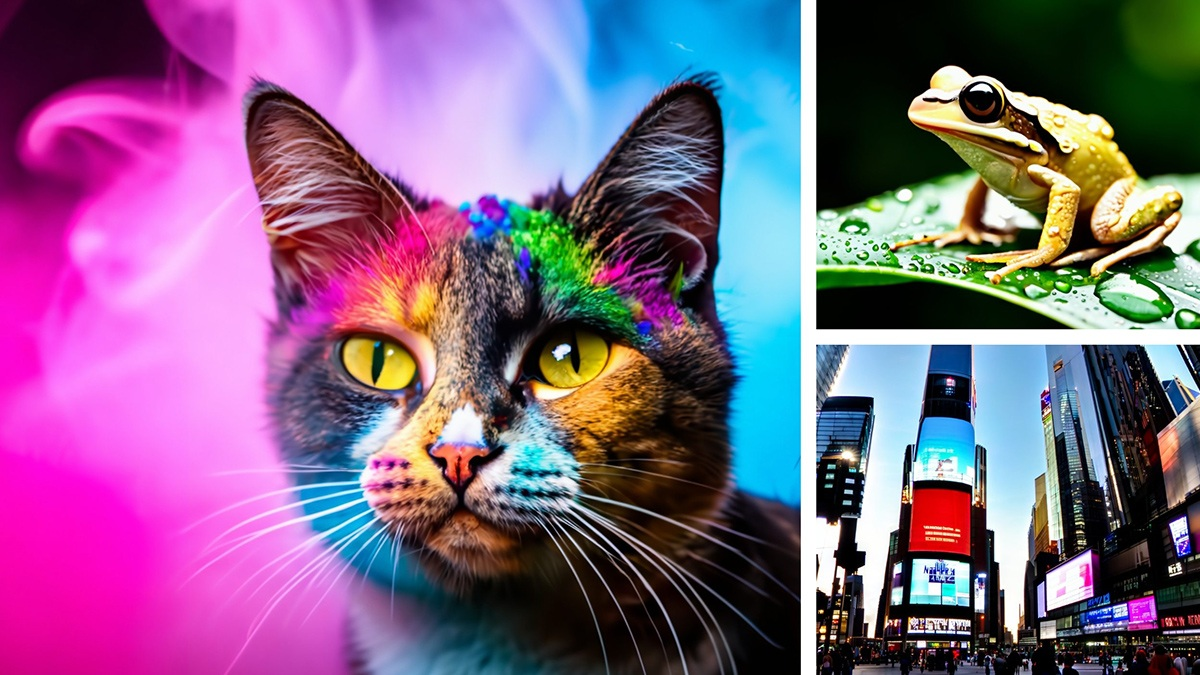

In [14]:
import IPython
import requests

image_url = "https://www.nvidia.com/content/dam/en-zz/Solutions/research/ai-playground/nvidia-picasso-3c33-p@2x.jpg"  ## Large Image
image_content = requests.get(image_url).content

IPython.display.Image(image_content)

In [15]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_core.messages import HumanMessage

llm = ChatNVIDIA(model="ai-neva-22b")

llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ]
)

ChatMessage(content='The image is a collage of three different pictures. The first picture features a cat with colorful paint on its face, giving it a unique and artistic appearance. The second picture is of a frog, and the third picture is of a city skyline with a large building in the background. The cat and the frog are both positioned in the foreground, while the city skyline is in the background, creating a visually interesting composition.', response_metadata={'role': 'assistant', 'content': 'The image is a collage of three different pictures. The first picture features a cat with colorful paint on its face, giving it a unique and artistic appearance. The second picture is of a frog, and the third picture is of a city skyline with a large building in the background. The cat and the frog are both positioned in the foreground, while the city skyline is in the background, creating a visually interesting composition.', 'name': None, 'token_usage': {'completion_tokens': 84, 'prompt_to

### Passing an image as a base64 encoded string

At the moment, some extra processing happens client-side to support larger images like the one above. But for smaller images (and to better illustrate the process going on under the hood), we can directly pass in the image as shown below: 

ChatMessage(content='The image depicts a dirt road surrounded by a lush green forest. The road is narrow and winding, with trees on both sides, creating a serene and peaceful atmosphere. The trees are tall and densely packed, giving the impression of a dense and thriving forest.\n\nThere are several cars parked along the side of the road, indicating that it is a popular spot for visitors to explore the natural beauty of the area. The cars are scattered throughout the scene, with some closer to the front and others further back, creating a sense of depth and movement along the road.', response_metadata={'role': 'assistant', 'content': 'The image depicts a dirt road surrounded by a lush green forest. The road is narrow and winding, with trees on both sides, creating a serene and peaceful atmosphere. The trees are tall and densely packed, giving the impression of a dense and thriving forest.\n\nThere are several cars parked along the side of the road, indicating that it is a popular spot 

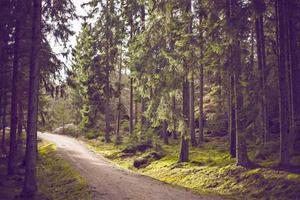

In [16]:
import base64
import IPython
import requests

from langchain_core.messages import HumanMessage

image_url = "https://picsum.photos/seed/kitten/300/200"
image_content = requests.get(image_url).content

## Works for simpler images. For larger images, see actual implementation
b64_string = base64.b64encode(image_content).decode("utf-8")

message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe this image:"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/png;base64,{b64_string}"},
        },
    ]
)

print(repr(llm.invoke([message])))

IPython.display.Image(image_content)

## Agentic Behavior

In [17]:
%pip install --upgrade --quiet langchain numexpr langchainhub

Note: you may need to restart the kernel to use updated packages.


### Example Usage Within Conversation Chains

Like any other integration, ChatNVIDIA is fine to support chat utilities like conversation buffers by default. Below, we show the [LangChain ConversationBufferMemory](https://python.langchain.com/docs/modules/memory/types/buffer) example applied to the `mixtral_8x7b` model.

In [18]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

# chat = ChatNVIDIA(model="mixtral_8x7b", temperature=0.1, max_tokens=100, top_p=1.0, stop=["\n\n"])
chat = ChatNVIDIA(model="ai-mixtral-8x7b-instruct", temperature=0.1, max_tokens=100, top_p=0.5, stop=["\n\n"])

conversation = ConversationChain(llm=chat, memory=ConversationBufferMemory())

messages = [
    "Hi there!",
    "Nice to meet you! My name is Sandy!",
    "What does my name make you think ok?",
]

for message in messages:
    print(conversation.invoke(message)["response"])

 Hello! I'm an AI, and I'm here to help answer your questions to the best of my ability. How can I assist you today?

 Hello Sandy! It's nice to meet you. I'm an AI, and I'm here to help answer any questions you might have. How can I assist you today?

 Based on the data I have been trained on, the name "Sandy" is often given to both boys and girls, but it is more commonly a nickname for the female name "Alexandra" or the male name "Alexander." It is also a unisex name that can be used as a given name in its own right. The name "Sandy" is of English origin and means "defender of mankind" or "protector of humanity." It may also bring


### Simple Usage With Tooled ReACT Agent

You can also use some of the more powerful LLM models for agentic behavior as described in [HuggingFace's Open-source LLMs as LangChain Agents](https://huggingface.co/blog/open-source-llms-as-agents) blog.

In [19]:
%pip install --quiet --upgrade wikipedia

Note: you may need to restart the kernel to use updated packages.


In [20]:
from langchain import hub
from langchain.agents import AgentExecutor, load_tools
from langchain.agents.format_scratchpad import format_log_to_str
from langchain.agents.output_parsers import (
    ReActJsonSingleInputOutputParser,
)
from langchain.tools.render import render_text_description

# setup tools
llm = ChatNVIDIA(model="mixtral_8x7b", temperature=0.1) 
tools = load_tools(["wikipedia"], llm=llm)

# setup ReAct style prompt
prompt = hub.pull("hwchase17/react-json")
prompt = prompt.partial(
    tools=render_text_description(tools),
    tool_names=", ".join([t.name for t in tools]),
)

## Add some light prompt engineering/llm guiding enforcement
prompt[1].prompt.template += "\nThought: "
chat_model_with_stop = llm.bind(stop=["\nObservation"])

history = []

def add_to_history(x, history, i=0):
  history += [[i, x]]
  return x

# define the agent
agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_log_to_str(x["intermediate_steps"]),
    }
    | prompt
    # | partial(add_to_history, history=history, i=1)
    | chat_model_with_stop
    # | partial(add_to_history, history=history, i=2)
    | ReActJsonSingleInputOutputParser()
    # | partial(add_to_history, history=history, i=3)
)

# instantiate AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True, handle_parsing_errors=True)

agent_executor.invoke(
    {
        "input": "What's something cool that happened at GTC this year (2024)?'"
    }
)



> Entering new AgentExecutor chain...
To answer this question, I need to find information about the 2024 GTC (GPU Technology Conference) and look for any cool happenings or announcements. I will use the wikipedia tool for this.

Action:
```
{
  "action": "wikipedia",
  "action_input": "GTC 2024"
}
```Page: Nvidia GTC
Summary: Nvidia GTC (GPU Technology Conference) is a global artificial intelligence (AI) conference for developers that brings together developers, engineers, researchers, inventors, and IT professionals. Topics focus on AI, computer graphics, data science, machine learning and autonomous machines. Each conference begins with a keynote from Nvidia CEO and Founder Jensen Huang, followed by a variety of sessions and talks with experts from around the world.
It originated in 2009 in San Jose, California, with an initial focus on the potential for solving computing challenges through GPUs. In recent years, the conference focus has shifted to various applications of artificia

{'input': "What's something cool that happened at GTC this year (2024)?'",
 'output': 'At GTC this year (2024), Nvidia officially revealed the Blackwell microarchitecture during the keynote by CEO Jensen Huang. This new architecture is a successor to Hopper and Ada Lovelace microarchitectures and was named after statistician and mathematician David Blackwell.'}

If an endpoint supports server-side function/tool calling (AKA the model API itself accepts a tooling message), then you can pull in the experimental `ServerToolsMixin` class as follows: 

In [21]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia_ai_endpoints.tools import ServerToolsMixin

class TooledChatNVIDIA(ServerToolsMixin, ChatNVIDIA):
    pass

try: 
    tools = load_tools(["wikipedia", "llm-math"], llm=llm)
    llm = TooledChatNVIDIA(model="mixtral_8x7b")
    tooled_llm = llm.bind_tools(tools)
    tooled_llm.invoke("Hello world!!")
except Exception as e:
    print(e)

llm.client.last_inputs["json"]


[422] Unprocessable Entity
body -> tools
  Extra inputs are not permitted (type=extra_forbidden)
RequestID: 16b6ed10-e53d-48b2-a08d-f995bb944cb9


{'messages': [{'role': 'user', 'content': 'Hello world!!'}],
 'model': 'mixtral_8x7b',
 'stream': False,
 'tools': [{'type': 'function',
   'function': {'name': 'wikipedia',
    'description': 'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.',
    'parameters': {'properties': {'__arg1': {'title': '__arg1',
       'type': 'string'}},
     'required': ['__arg1'],
     'type': 'object'}}},
  {'type': 'function',
   'function': {'name': 'Calculator',
    'description': 'Useful for when you need to answer questions about math.',
    'parameters': {'properties': {'__arg1': {'title': '__arg1',
       'type': 'string'}},
     'required': ['__arg1'],
     'type': 'object'}}}]}

This feature is intended for experimental purposes to help users support and develop tool-calling interfaces. It's also a simple example of how to support and experiment with custom methods via Mixin incorporation.

## **Advanced Use Cases:** 

### **Forcing Payload**

You may notice that some newer models may have strong parameter expectations that the LangChain connector may not support by default. For example, we cannot invoke the [Kosmos](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/kosmos-2) model at the time of this notebook's latest release due to the lack of a streaming argument on the server side: 

In [22]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

kosmos = ChatNVIDIA(model="kosmos_2")

from langchain_core.messages import HumanMessage

# kosmos.invoke(
#     [
#         HumanMessage(
#             content=[
#                 {"type": "text", "text": "Describe this image:"},
#                 {"type": "image_url", "image_url": {"url": image_url}},
#             ]
#         )
#     ]
# )

# # Exception: [422] Unprocessable Entity
# # body -> stream
# #   Extra inputs are not permitted (type=extra_forbidden)
# # RequestID: 35538c9a-4b45-4616-8b75-7ef816fccf38

# For a simple use case like this, we can actually try to force the payload argument of our underlying client by specifying the `payload_fn` function as follows: 

def drop_streaming_key(d):
    """Takes in payload dictionary, outputs new payload dictionary"""
    if "stream" in d:
        d.pop("stream")
    return d


## Override the payload passthrough. Default is to pass through the payload as is.
kosmos = ChatNVIDIA(model="kosmos_2")
kosmos.client.payload_fn = drop_streaming_key

image_url = "https://picsum.photos/seed/kitten/300/200"

kosmos.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ]
)

ChatMessage(content='<phrase>road in the forest</phrase>', response_metadata={'role': 'assistant', 'content': '<phrase>road in the forest</phrase>', 'entities': [{'phrase': 'road in the forest', 'bboxes': [[0.109375, 0.640625, 0.703125, 0.984375]]}], 'token_usage': {'completion_tokens': 11, 'prompt_tokens': 73, 'total_tokens': 84}, 'model_name': 'kosmos_2'}, role='assistant')

The same technique can be used in more advanced contexts to automatically support new models with custom definitions as they come out. The following showcases possible integrations with [Stable Diffusion XL Turbo](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/sdxl-turbo) for image generation.

***NOTE:** Image generation models are now supported with the `ImageGenModel` client. For details, please check out the LLM Integration.*

In [34]:
import base64
from io import BytesIO
from PIL import Image

from langchain_core.output_parsers import StrOutputParser

# img_gen = ChatNVIDIA(model="sdxl")
img_gen = ChatNVIDIA(model="ai-stable-diffusion-xl")

# def print_return(d):
#     if d: print(d)
#     return d

# img_gen.client.payload_fn = print_return

# img_gen.invoke("Give me a cute picture of a kitten!")

## OUTPUT:
# {'messages': [{'role': 'user', 'content': 'Give me a cute picture of a kitten!'}], 'stream': False}
# Exception: [422] Unprocessable Entity
# body -> prompt
#   Field required (type=missing)
# body -> messages
#   Extra inputs are not permitted (type=extra_forbidden)
# body -> stream
#   Extra inputs are not permitted (type=extra_forbidden)
# RequestID: 5b841a81-7c97-4936-a5f2-d85453a9bbc4


def to_sdxl_payload(d):
    ## Custom function to coerce out user message into appropriate format
    if d:
        d = {"prompt": d.get("messages", [{}])[0].get("content")}
        # d["inference_steps"] = 100  ## why not add some more arguments?
        # d["negative_prompt"] = "ugly,bad eyes,low-res,crooked nose"

        ## NOTE: content and b64_json will be coerced to AIMessage content.
        ## If not built in, a string of the response will be returned as content.
        ## From there, feel free to use json.loads, maybe replacing ' with "
    return d


img_gen.client.payload_fn = to_sdxl_payload
str(img_gen.invoke("Give me a cute picture of a kitten!"))[:300]

Exception: [422] Unprocessable Entity
body -> text_prompts
  Field required (type=missing)
body -> prompt
  Extra inputs are not permitted (type=extra_forbidden)
body -> inference_steps
  Extra inputs are not permitted (type=extra_forbidden)
body -> negative_prompt
  Extra inputs are not permitted (type=extra_forbidden)
RequestID: 48556023-dbea-44b3-9fdb-c3d5b0bd6682

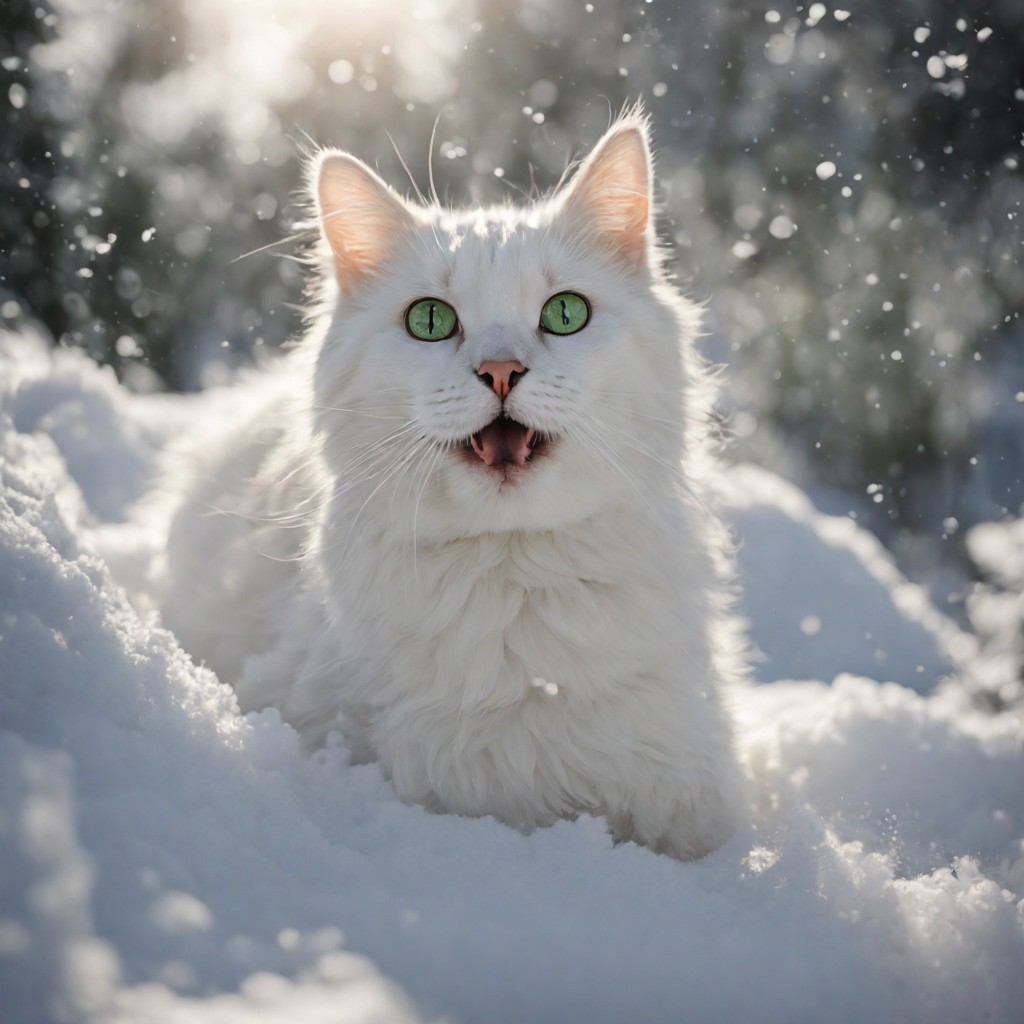

In [24]:
def to_pil_img(d):
    return Image.open(BytesIO(base64.b64decode(d.response_metadata.get("b64_json"))))


(img_gen | to_pil_img).invoke(
    "happy white cat with green eyes playing in the snow, high-quality artistic"
)

For more advanced or custom use-cases, you may be interested in leveraging the `NVEModel` client as a requests backbone. The `NVIDIAEmbeddings` and `ImageGetNVIDIA` classes are good starting points.

### **Usage/Cost Tracking**

For tracking model usage and , you can use the `get_usage_callback` context manager to track token information similar to `get_openai_callback`. Additionally, you can specify custom price mappings as necessary (`price_map` argument), or provide a custom callback manager for advanced use-cases (`callback` argument). 

**NOTE:** This feature is currently not supported in streaming modes, but works fine for non-streaming `invoke/ainvoke` queries. 

In [25]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA, NVIDIAEmbeddings
from langchain_nvidia_ai_endpoints.callbacks import get_usage_callback

## Assume a price map per 1K tokens for a particular deployment plan
price_map = {
    "mixtral_8x7b": 0.00060,
    "gemma_7b": 0.0002,
    "nvolveqa_40k": 0.000016,
} 

llm_large = ChatNVIDIA(model="mixtral_8x7b", temperature=0.1)
llm_small = ChatNVIDIA(model="gemma_2b", temperature=0.1)
embedding = NVIDIAEmbeddings(model="nvolveqa_40k")
models = [llm_large, llm_small, embedding]

with get_usage_callback(price_map=price_map) as cb:
    ## Reset either at beginning or end. Statistics will run until cleared
    cb.reset()

    llm_large.invoke("Tell me a joke")
    print(cb, end="\n\n")
    # llm_large.invoke("Tell me a short joke")
    # print(cb, end="\n\n")
    # ## Tracking through streaming coming soon
    # [_ for _ in llm_small.stream("Tell me a joke")]
    # print(cb, end="\n[Should not change yet]\n\n")
    ## Tracking for streaming supported
    embedding.embed_query("What a nice day :D")
    print(cb, end="\n\n")
    # ## Sanity check. Should still be tracked fine
    # llm_small.invoke("Tell me a long joke")
    # print(cb, end="\n\n")

## Out of scope. Will not be tracked
llm_small.invoke("Tell me a short joke")
print(cb, end="\n[Should not change ever]\n\n")
cb.model_usage

Tokens Used: 78
	Prompt Tokens: 13
	Completion Tokens: 65
Successful Requests: 1
Total Cost (USD): $4.68e-05

Tokens Used: 88
	Prompt Tokens: 23
	Completion Tokens: 65
Successful Requests: 2
Total Cost (USD): $4.696e-05

Tokens Used: 88
	Prompt Tokens: 23
	Completion Tokens: 65
Successful Requests: 2
Total Cost (USD): $4.696e-05
[Should not change ever]



{'total': {'total_tokens': 88,
  'prompt_tokens': 23,
  'completion_tokens': 65,
  'successful_requests': 2,
  'total_cost': 4.696e-05},
 'mixtral_8x7b': {'total_tokens': 78,
  'prompt_tokens': 13,
  'completion_tokens': 65,
  'successful_requests': 1,
  'total_cost': 4.68e-05},
 'nvolveqa_40k': {'total_tokens': 10,
  'prompt_tokens': 10,
  'completion_tokens': 0,
  'successful_requests': 1,
  'total_cost': 1.6e-07}}

### Connecting To Other Services via `.mode`

In addition to connecting to the AI Foundation Endpoints, the same connector can be used to connect to other hosted endpoints and even local microservice instances like [**NeMo Inference Microservices (NIM)**]. Because of a built-in support for the OpenAPI specification standard, we can implement this kind of customization by simply switching out some endpoints and making sure we're passing around the right information. You can check out the `mode` method which switches over between different provider endpoints like NVIDIA AI Foundation Endpoints, NVIDIA API Catalog, OpenAI, and even local connection.

In [28]:
from getpass import getpass
import os

if not os.environ.get("OPENAI_API_KEY", "").startswith("sk-"):
    os.environ["OPENAI_API_KEY"] = getpass("OPENAI_API_KEY: ")

Note that this client is intended as a light-weight solution, so feel free to check the implementation and use the tricks above to customize the connector for your purposes. The connector is intentionally easy to modify and customize, and the implementation of `mode` should serve as a decent starting point!

In [29]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia_ai_endpoints._common import _NVIDIAClient

# ChatNVIDIA().mode("nvidia").available_models  ## Actual default
# ChatNVIDIA.mode("nim", base_url="http://0.0.0.0:8000").available_models  ## Assumes nim is running
ChatNVIDIA().mode("openai").available_models  ## OpenAI Compatability

## NOTE: get_available_models is a class method that also exists. Requires specification of mode
# ChatNVIDIA().mode("openai").get_available_models()  ## Ignored mode
ChatNVIDIA().mode("openai").get_available_models(mode="openai")  ## OpenAI Compatability

[Model(id='gpt-3.5-turbo-0125', model_type='chat', api_type=None, kwargs={}, client='ChatNVIDIA', path='system'),
 Model(id='gpt-3.5-turbo-0301', model_type='chat', api_type=None, kwargs={}, client='ChatNVIDIA', path='openai'),
 Model(id='gpt-3.5-turbo-0613', model_type='chat', api_type=None, kwargs={}, client='ChatNVIDIA', path='openai'),
 Model(id='gpt-3.5-turbo-1106', model_type='chat', api_type=None, kwargs={}, client='ChatNVIDIA', path='system'),
 Model(id='gpt-3.5-turbo-16k-0613', model_type='chat', api_type=None, kwargs={}, client='ChatNVIDIA', path='openai'),
 Model(id='gpt-3.5-turbo-16k', model_type='chat', api_type=None, kwargs={}, client='ChatNVIDIA', path='openai-internal'),
 Model(id='gpt-3.5-turbo', model_type='chat', api_type=None, kwargs={}, client='ChatNVIDIA', path='openai'),
 Model(id='gpt-4-0125-preview', model_type='chat', api_type=None, kwargs={}, client='ChatNVIDIA', path='system'),
 Model(id='gpt-4-0613', model_type='chat', api_type=None, kwargs={}, client='Chat

In [30]:
## Core LC Chat Interface
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# llm = ChatNVIDIA().mode("nvidia")  ## Actual default
# llm = ChatNVIDIA().mode("nim", model="mixtral_8x7b", base_url="http://0.0.0.0:8000") 
# llm = ChatNVIDIA().mode("catalog", model="mixtral_8x7b")
llm = ChatNVIDIA().mode("openai", model="gpt-4")
# result = llm.invoke("Write a ballad about LangChain.")
# print(result.content)

for token in llm.stream("Tell me a bit about yourself. 3 lines, \n between each, 10 words per line."):
    print(token.content, end="|")


|I| am| an| artificial| intelligence|,| developed| by| Open|AI|.| 
|Ass|isting| users|,| providing| information|,| perform| tasks|,| are| my| key| features|.| 
|Contin|uously| learning| and| evolving|,| I| strive| to| make| interactions| better|.||

In [31]:
llm.client.last_inputs['json']

{'messages': [{'role': 'user',
   'content': 'Tell me a bit about yourself. 3 lines, \n between each, 10 words per line.'}],
 'model': 'gpt-4',
 'stream': True}

In [32]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia_ai_endpoints.tools import ServerToolsMixin

from langchain_core.pydantic_v1 import BaseModel, Field


# Note that the docstrings here are crucial, as they will be passed along
# to the model along with the class name.
class Multiply(BaseModel):
    """Multiply two integers together."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")

class TooledChatNVIDIA(ServerToolsMixin, ChatNVIDIA):
    pass

llm = TooledChatNVIDIA().mode("openai", model="gpt-3.5-turbo-0125")
llm.bind_tools([Multiply]).invoke("Multiply for me please?")

ChatMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_gRSzQLgX5Veq0UL2oAkw2gHW', 'type': 'function', 'function': {'name': 'Multiply', 'arguments': '{"a": 5, "b": 10}'}}, {'id': 'call_JYwEg5MtyBtdV4S84krr0ehc', 'type': 'function', 'function': {'name': 'Multiply', 'arguments': '{"a": 7, "b": 3}'}}]}, response_metadata={'role': 'assistant', 'content': None, 'tool_calls': [{'id': 'call_gRSzQLgX5Veq0UL2oAkw2gHW', 'type': 'function', 'function': {'name': 'Multiply', 'arguments': '{"a": 5, "b": 10}'}}, {'id': 'call_JYwEg5MtyBtdV4S84krr0ehc', 'type': 'function', 'function': {'name': 'Multiply', 'arguments': '{"a": 7, "b": 3}'}}], 'token_usage': {'prompt_tokens': 60, 'completion_tokens': 51, 'total_tokens': 111}, 'model_name': 'gpt-3.5-turbo-0125'}, role='assistant')

In [33]:
llm.client.last_response.json()

{'id': 'chatcmpl-97yf7XMR19djRON0QHsWihxPBmpwO',
 'object': 'chat.completion',
 'created': 1711688509,
 'model': 'gpt-3.5-turbo-0125',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': None,
    'tool_calls': [{'id': 'call_gRSzQLgX5Veq0UL2oAkw2gHW',
      'type': 'function',
      'function': {'name': 'Multiply', 'arguments': '{"a": 5, "b": 10}'}},
     {'id': 'call_JYwEg5MtyBtdV4S84krr0ehc',
      'type': 'function',
      'function': {'name': 'Multiply', 'arguments': '{"a": 7, "b": 3}'}}]},
   'logprobs': None,
   'finish_reason': 'tool_calls'}],
 'usage': {'prompt_tokens': 60, 'completion_tokens': 51, 'total_tokens': 111},
 'system_fingerprint': 'fp_3bc1b5746c'}